# Machine Learning: Drone

No arquivo drone_data.csv, você recebeu dados consolidados de vários voos realizados pelo mesmo drone de entrega.

- **flight:** número do voo;
- **speed:** velocidade média durante o voo (m/s)
- **payload:** peso da carga transportada (g)
- **altitude:** altitude de cruzeiro predefinida (m)
- **date:** data do voo
- **local_time:** horário em que o voo ocorreu 
- **route** sigla da rota que o drone voou
- **total_energy:** energia total consumida da bateria (J)
- **mean_wind_speed:** velocidade média do vento (m/s)
- **flight_duration:** tempo total de duração do voo (s)

Estes são dados de um drone quadcoptero real utilizado para entrega de pacotes. O dataset foi disponibilizado online no KiltHub em 2020. Seguem os autores e link para o repositório original:

Rodrigues, Thiago A.; Patrikar, Jay; Choudhry, Arnav; Feldgoise, Jacob; Arcot, Vaibhav; Gahlaut, Aradhana; et al. (2020): Data Collected with Package Delivery Quadcopter Drone. Carnegie Mellon University. Dataset. https://doi.org/10.1184/R1/12683453.v3 (fora do ar)


### 1. Exploração de dados

**COMANDO:** Crie um modelo de Aprendizado de Máquina para prever a rota (**route**) que o drone tomou baseado nos atributos de voo. Você deve obter uma Acurácia de pelo menos 90%.

In [ ]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# leitura dos dados
df1 = pd.read_csv('drone_data.csv', encoding='UTF-8', sep=',')

In [ ]:
df1

,flight,speed,payload,altitude,date,local_time,route,total_energy,mean_wind_speed,flight_duration
0,1,4.0,0.0,25,2019-04-07,10:13,non R1,78473,3.90,200.70
1,2,4.0,0.0,50,2019-04-07,10:23,non R1,91363,3.52,271.20
2,3,6.0,0.0,25,2019-04-07,10:33,non R1,61487,4.58,180.10
3,4,8.0,0.0,25,2019-04-07,10:48,non R1,52915,4.60,171.00
4,5,4.0,0.0,25,2019-04-07,11:05,non R1,68589,3.33,217.00
...,...,...,...,...,...,...,...,...,...,...
202,271,10.0,0.0,25,2019-09-19,10:22,non R1,66141,5.70,184.70
203,272,4.0,250.0,50,2019-09-19,10:29,non R1,135888,3.93,428.29
204,275,8.0,500.0,25,2019-10-24,9:05,R1,58671,4.14,149.40
205,276,10.0,500.0,25,2019-10-24,9:32,R1,55485,4.39,147.90


### 2. Análise descritiva de dados

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight           207 non-null    int64  
 1   speed            207 non-null    float64
 2   payload          207 non-null    float64
 3   altitude         207 non-null    int64  
 4   date             207 non-null    object 
 5   local_time       207 non-null    object 
 6   route            207 non-null    object 
 7   total_energy     207 non-null    int64  
 8   mean_wind_speed  207 non-null    float64
 9   flight_duration  207 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 16.3+ KB


**EXPLICAÇÃO:** O dataset tem no total 207 linhas, pelo visto não há dados faltantes.

O próximo gráfico mostra as correlações entre as colunas.

In [ ]:
# usando o get dummies para dar base para o correlation matrix
df1_corr = pd.get_dummies(df1, columns=['route'])

<ipython-input-18-1060a705bb81>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1_corr.corr().round(2)


<Axes: >

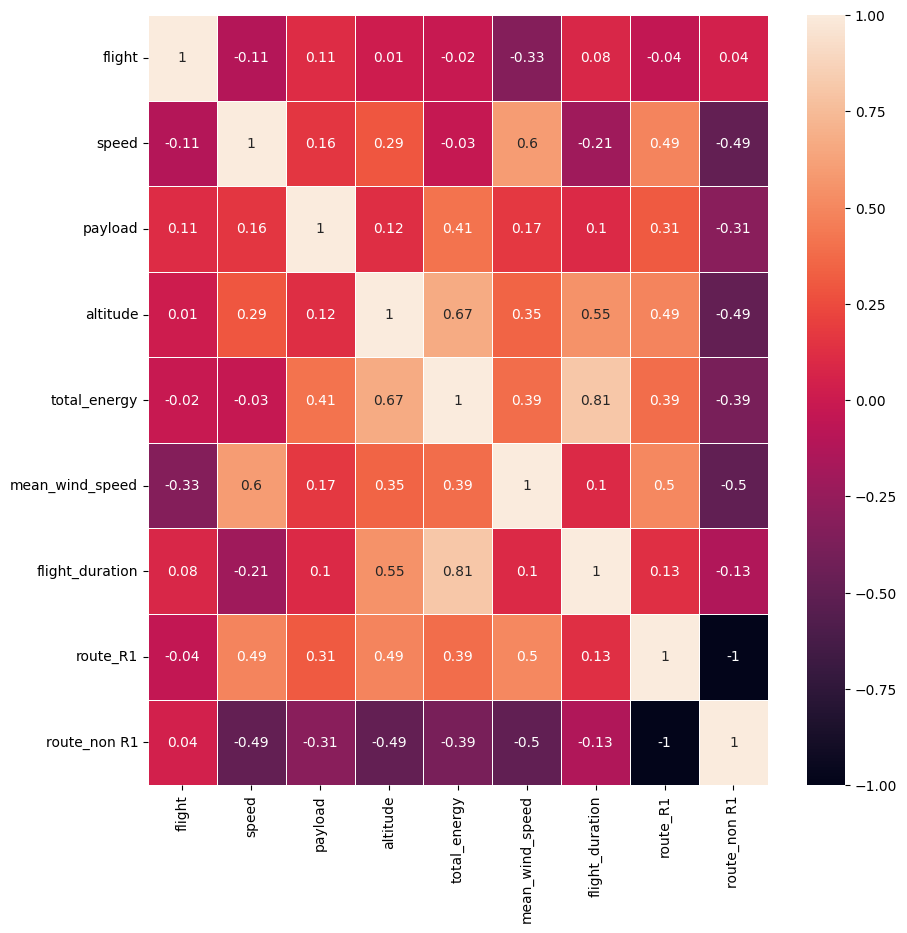

In [ ]:
import seaborn as sns 
correlation_matrix = df1_corr.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

### 3. Tratamento de dados

**EXPLICAÇÃO:** A seguir tem um gráfico boxplot para ver se tem algum outlier ou dado absurdo.

Text(0.5, 1.0, 'flight duration')

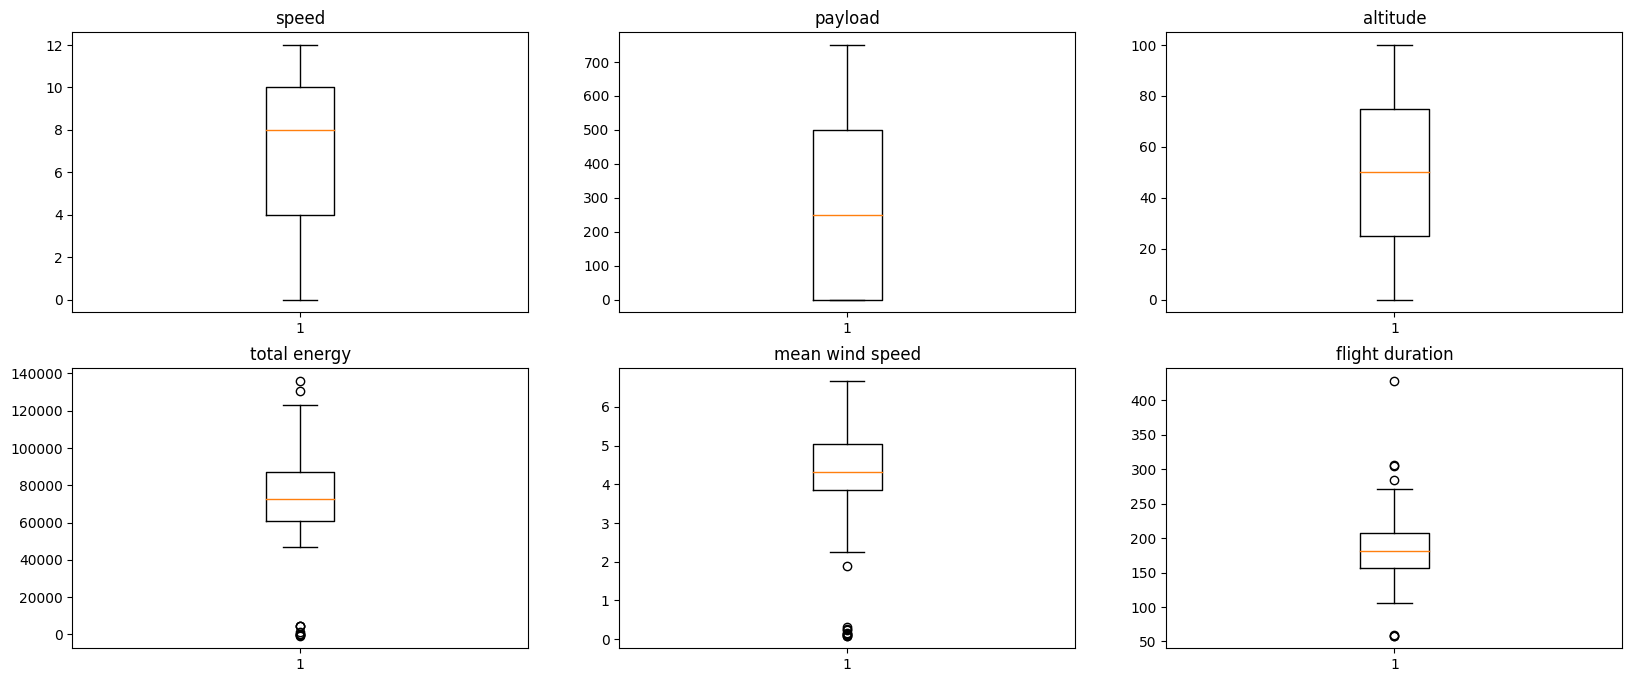

In [ ]:
fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(2, 3, figsize=(20,8))

ax1.boxplot(df1['speed'])
ax1.set_title('speed')

ax2.boxplot(df1['payload'])
ax2.set_title('payload')

ax3.boxplot(df1['altitude'])
ax3.set_title('altitude')

ax4.boxplot(df1['total_energy'])
ax4.set_title('total energy')

ax5.boxplot(df1['mean_wind_speed'])
ax5.set_title('mean wind speed')

ax6.boxplot(df1['flight_duration'])
ax6.set_title('flight duration')

**EXPLICAÇÃO:** Nota-se que no atributo 'speed', há valores iguais a 0. Voltando no dataset, percebemos que são valores absurdos, pois é impossível ter uma velocidade igual a 0 sendo que houve tempo de voo e gasto de energia do avião.

Outro dado estranho se localiza em 'total_energy' onde a energial total gasta é negativa, o que é um absurdo. Nesse sentido, tirando apenas linhas com speed igual a 0, já elimina as energias negativas.

In [ ]:
# removendo dados que a velocidade (speed) é igual a 0
df2 = df1.loc[df1['speed'] != 0]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 206
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight           194 non-null    int64  
 1   speed            194 non-null    float64
 2   payload          194 non-null    float64
 3   altitude         194 non-null    int64  
 4   date             194 non-null    object 
 5   local_time       194 non-null    object 
 6   route            194 non-null    object 
 7   total_energy     194 non-null    int64  
 8   mean_wind_speed  194 non-null    float64
 9   flight_duration  194 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 16.7+ KB


Text(0.5, 1.0, 'flight duration')

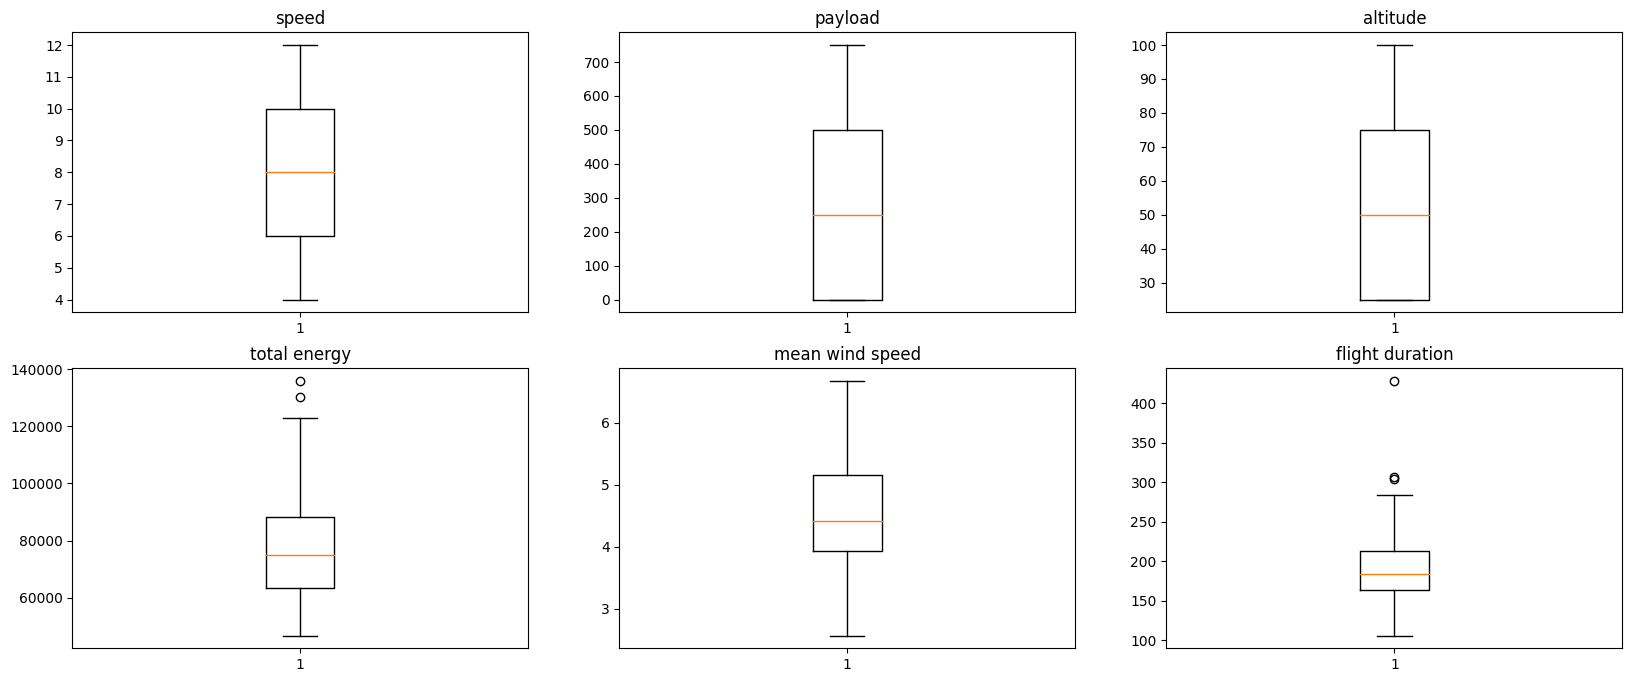

In [ ]:
fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(2, 3, figsize=(20,8))

ax1.boxplot(df2['speed'])
ax1.set_title('speed')

ax2.boxplot(df2['payload'])
ax2.set_title('payload')

ax3.boxplot(df2['altitude'])
ax3.set_title('altitude')

ax4.boxplot(df2['total_energy'])
ax4.set_title('total energy')

ax5.boxplot(df2['mean_wind_speed'])
ax5.set_title('mean wind speed')

ax6.boxplot(df2['flight_duration'])
ax6.set_title('flight duration')

**EXPLICAÇÃO:** Usaremos o LabelEncoder para transformar a coluna 'route' em valores binários para dar base ao nosso modelo de machine learning.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

label.fit(df2['route'])

df2['label_route'] = label.transform(df2['route'])

# comando para inverter os valores binários de 0 para 1 e de 1 para 0
df2['label_route'] = ~df2['label_route'] + 2

<ipython-input-20-3d4b95fc21a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label_route'] = label.transform(df2['route'])
<ipython-input-20-3d4b95fc21a9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label_route'] = ~df2['label_route'] + 2


In [ ]:
df2

,flight,speed,payload,altitude,date,local_time,route,total_energy,mean_wind_speed,flight_duration,label_route
0,1,4.0,0.0,25,2019-04-07,10:13,non R1,78473,3.90,200.70,0
1,2,4.0,0.0,50,2019-04-07,10:23,non R1,91363,3.52,271.20,0
2,3,6.0,0.0,25,2019-04-07,10:33,non R1,61487,4.58,180.10,0
3,4,8.0,0.0,25,2019-04-07,10:48,non R1,52915,4.60,171.00,0
4,5,4.0,0.0,25,2019-04-07,11:05,non R1,68589,3.33,217.00,0
...,...,...,...,...,...,...,...,...,...,...,...
202,271,10.0,0.0,25,2019-09-19,10:22,non R1,66141,5.70,184.70,0
203,272,4.0,250.0,50,2019-09-19,10:29,non R1,135888,3.93,428.29,0
204,275,8.0,500.0,25,2019-10-24,9:05,R1,58671,4.14,149.40,1
205,276,10.0,500.0,25,2019-10-24,9:32,R1,55485,4.39,147.90,1


### 4. Treino e teste do modelo

#### a) Previsão da rota do avião (route)

In [ ]:
# criando um novo dataset sem as colunas date e local_time
df3 = df2.drop(columns=['date', 'local_time'])

In [ ]:
df3[['route']].groupby('route').value_counts()

route
R1        182
non R1     12
dtype: int64

**EXPLICAÇÃO:** Observa-se que há uma grande discrepância entre a quantidade de dados R1 e non R1

Usaremos oversampling para tentar equilibrar essa quantidade a fim de melhorar a precisão do modelo de machine learning.

In [ ]:
from sklearn.utils import resample

# separar a classe minoritária (0) e majoritária (1)
df_minority = df3[df3.label_route == 0]
df_majority = df3[df3.label_route == 1]

# aplicar oversampling na classe minoritária
df_minority_oversampled = resample(df_minority, 
                                   replace=True, 
                                   n_samples=len(df_majority), 
                                   random_state=42)

# juntar as classes minoritária e majoritária novamente
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

In [ ]:
df_oversampled[['route']].groupby('route').value_counts()

route
R1        182
non R1    182
dtype: int64

In [ ]:
#!pip install boruta

from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

X_boruta = df_oversampled.drop(columns=['route', 'label_route', 'flight'])
y_boruta = df_oversampled['label_route']

rfc = RandomForestClassifier()
boruta = BorutaPy(rfc, n_estimators='auto', verbose=2, max_iter=50)
boruta.fit(X_boruta.values, y_boruta.values)

cols = [(nome, ranking) for nome, ranking in zip(X_boruta.columns, boruta.ranking_)]
cols = sorted(cols, key=lambda x: x[1])

# Imprima os nomes das colunas selecionadas e seus respectivos rankings
print()
print("RANKING")
print()
for nome, ranking in cols:
    print(f"{nome}: {ranking}")

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	6
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 50
Confirmed: 	6
Tentative: 	0
Rejected: 	0

RANKING

speed: 1
payload: 1
altitude: 1
total_energy: 1
mean_wind_speed: 1
flight_duration: 1


**EXPLICAÇÃO:** De acordo com a lib boruta, todas as colunas são boas para a predição do label_route

In [ ]:
from sklearn.model_selection import train_test_split

X = df_oversampled.drop(columns=['route', 'label_route', 'flight'])
y = df_oversampled['label_route']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=34,
                       random_state=RandomState(MT19937) at 0x7FBDD44C3840)

In [ ]:
y_test_prediction = rfc.predict(X_test)
y_train_prediction = rfc.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report

# Metricas de precisão, revocação, f1-score e acurácia.
print('TESTE')
print(classification_report(y_test, y_test_prediction))
print()
print('TREINO')
print(classification_report(y_train, y_train_prediction))

TESTE
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.90      0.95        20

    accuracy                           0.95        37
   macro avg       0.95      0.95      0.95        37
weighted avg       0.95      0.95      0.95        37


TREINO
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       162

    accuracy                           1.00       327
   macro avg       1.00      1.00      1.00       327
weighted avg       1.00      1.00      1.00       327



**EXPLICAÇÃO:** Resultados precisos tanto no teste quanto no treino com pouca ou sem diferença entre os valores de precisão, indicando grande chance de ausência de  overfitting.

#### b) Previsão de energia consumida da bateria (total_energy)

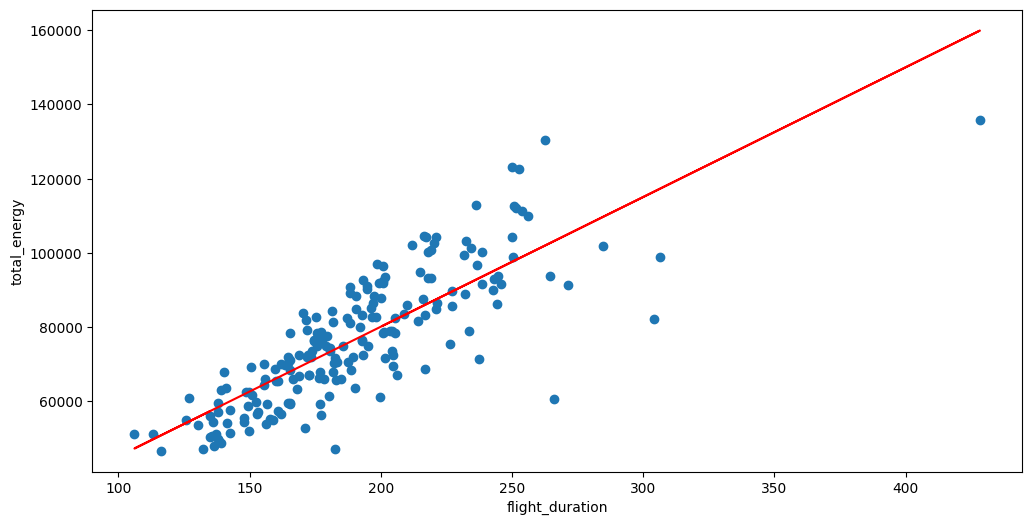

In [ ]:
plt.figure(figsize=(12, 6))

# calcular os coeficientes da equação da linha de regressão linear
coef = np.polyfit(df3['flight_duration'], df3['total_energy'], 1)
m = coef[0]  # Coeficiente angular
b = coef[1]  # Coeficiente linear

#y = mx + b --- equação para visualizar a linha vermelha

plt.scatter(df3['flight_duration'], df3['total_energy'])
plt.plot(df3['flight_duration'], m*df3['flight_duration']+b, color='red')
plt.xlabel('flight_duration')
plt.ylabel('total_energy')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

# separar as features e o target
X = df3.drop(columns=['route', 'total_energy'])
y = df3['total_energy']

# dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

# normalizar as variáveis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train_scaled, y_train)

Lasso()

In [ ]:
y_test_prediction = lasso.predict(X_test_scaled)
y_train_prediction = lasso.predict(X_train_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# calcula as métricas de treino e teste
metrics = [('R2', r2_score),
           ('MSE', mean_squared_error),
           ('MAE', mean_absolute_error), 
           ('rho', pearsonr)]

results = {}

for name, metric in metrics:
    results[name + '_test'] = metric(y_test, y_test_prediction)
    results[name + '_train'] = metric(y_train, y_train_prediction)

# imprime os resultados
print("LASSO REGRESSION")
print()
print("TESTE")
print('\n'.join([f"{name}: {value}" for name, value in results.items() if 'test' in name]))
print()
print("TREINO")
print('\n'.join([f"{name}: {value}" for name, value in results.items() if 'train' in name]))

LASSO REGRESSION

TESTE
R2_test: 0.9719028492465009
MSE_test: 10377292.04500698
MAE_test: 2377.3523926226544
rho_test: PearsonRResult(statistic=0.9863221402985929, pvalue=1.514475123209612e-15)

TREINO
R2_train: 0.919866966748503
MSE_train: 24199898.181672998
MAE_train: 3961.085134066218
rho_train: PearsonRResult(statistic=0.9590969595364177, pvalue=3.3826405446991723e-96)


**EXPLICAÇÃO:** Valores do R2 entre teste e treino não se diferenciam demasiadamente (o mesmo vale para o MSE), sendo que no teste houve acurácia maior. Isso é um indicativo de ausência de overfitting.